In [1]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2  # importing cv
import imutils
import glob
from PIL import Image, ImageOps

#We need these in this file:
import sys
sys.path.append('cropping')
import load_read_name_extractor as lrne
import progressbar
import time

In [2]:
from tqdm.notebook import trange, tqdm
from time import sleep

In [3]:
def it_hog(img_list, ori, ppc, cpb, bn):
    hog_features = []
    temp_list = []
    size = len(img_list)
    progress_bar = tqdm(img_list, total=len(img_list), desc="Processing images")
    for i in range(size):
        temp_list.append(color.rgb2gray(img_list[i]))
        fd, hog_image = hog(temp_list[i], orientations=ori, pixels_per_cell=ppc,
                        cells_per_block=cpb, visualize=True, block_norm=bn)
        temp_list[i] = hog_image
        hog_features.append(fd)
        # Update the progress bar
        progress_bar.update(1)
    progress_bar.close()
    return temp_list, hog_features

In [4]:
def mirror_each(img):
    mirror = cv2.flip(img,1)
    flip = cv2.flip(img,0)
    mirror_flip = cv2.flip(mirror,0)
    return [mirror, flip, mirror_flip]

def expand_with_mirror(img_list, names):
    temp_img_list = []
    temp_names = []
    for i in range(len(img_list)):
        mirrors = mirror_each(img_list[i])
        temp_img_list.append(img_list[i])
        temp_names.append(names[i])
        for j in range(len(mirrors)):
            temp_img_list.append(mirrors[j])
            temp_names.append(names[i])
    return temp_img_list, temp_names

In [5]:
img_list, names = lrne.load_name_and_img("cropped_96_192/*.jpeg")

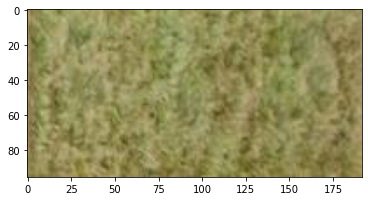

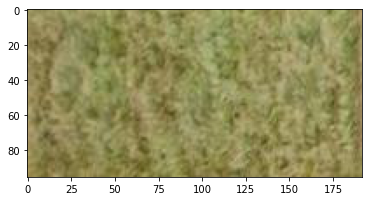

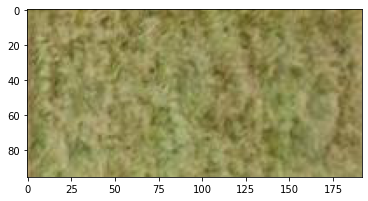

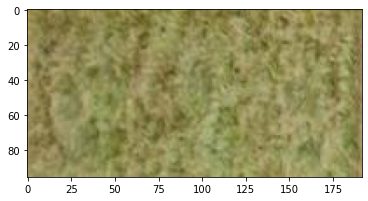

In [6]:
mirrors = mirror_each(img_list[0])
plt.imshow(img_list[0])
plt.show()
for img in mirrors:
    plt.imshow(img)
    plt.show()


In [ ]:
pic_folders = ["cropped_64_128/*.jpeg","cropped_96_192/*.jpeg","cropped_72_248/*.jpeg"]
progress_bar1 = tqdm(pic_folders, total=len(pic_folders), desc="Folder Progress")
for k in range(len(pic_folders)):
    img_list, names = lrne.load_name_and_img(pic_folders[k])
    range_x = 4
    if (k==0):
        range_x = 10
    range_y = 16
    range_x2 = 2
    range_y2 = 10
    step = 2
    step2 = 2
    number_of_it = int(((range_x-range_y)/step)*((range_x2-range_y2)/step2))
    progress_bar2 = tqdm(total=number_of_it, desc="Iteration of PPC and CPB")
    for i in range (range_x,range_y, step):
        for j in range (range_x2,range_y2, step2):
            img_shape = img_list[0].shape
            ori=9
            ppc=(i,i)
            cpb=(j,j)
            bn="L2"
            mir = False
            if mir == True:
                img_list_t, names_t = expand_with_mirror(img_list, names)
                try:
                    xxx, features = it_hog(img_list_t, ori=9, ppc=ppc, cpb=cpb, bn=bn)
                except ValueError as e:
                    print("Error processing image: ","PPC: " + str(ppc),"CPB: " + str(cpb) ,  e)
                    continue
                iteration = str(img_shape)+"_cells_"+str(ppc)+"_block_"+str(cpb)+"_norm_"+str(bn) + "_mir_" + str(mir)
                lrne.save_in_txt(names_t, "names/img_names_" + iteration)
                lrne.save_in_txt(features, "Features/hog_features_" + iteration)
                progress_bar2.update(1)
            else:
                try:
                    xxx, features = it_hog(img_list, ori=9, ppc=ppc, cpb=cpb, bn=bn)
                except ValueError as e:
                    print("Error processing image: ","PPC: " + str(ppc),"CPB: " + str(cpb) ,  e)
                    continue
                iteration = str(img_shape)+"_cells_"+str(ppc)+"_block_"+str(cpb)+"_norm_"+str(bn) + "_mir_" + str(mir)
                lrne.save_in_txt(names, "names/img_names_" + iteration)
                lrne.save_in_txt(features, "Features/hog_features_" + iteration)
                progress_bar2.update(1)
    progress_bar1.update(1)
progress_bar1.close()
progress_bar2.close()

Folder Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration of PPC and CPB:   0%|          | 0/12 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Error processing image:  PPC: (10, 10) CPB: (8, 8) negative dimensions are not allowed


Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Error processing image:  PPC: (12, 12) CPB: (8, 8) negative dimensions are not allowed


Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Error processing image:  PPC: (14, 14) CPB: (6, 6) negative dimensions are not allowed


Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Error processing image:  PPC: (14, 14) CPB: (8, 8) negative dimensions are not allowed


Iteration of PPC and CPB:   0%|          | 0/24 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Error processing image:  PPC: (14, 14) CPB: (8, 8) negative dimensions are not allowed


Iteration of PPC and CPB:   0%|          | 0/24 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

In [ ]:
features[0].shape